/tmp/ipykernel_127/870330298.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['count_sent'].loc[train['count_sent']>10] = 10


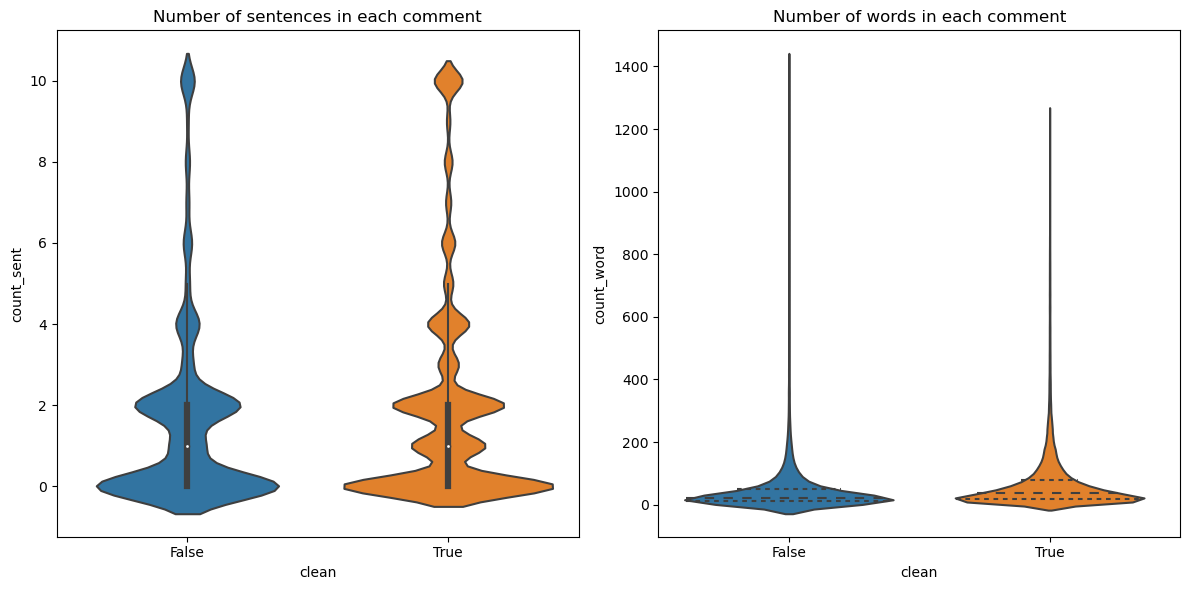

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load in the training data
train = pd.read_csv('data/train.csv')

# Add a "clean" column indicating non-toxic comments
rowsums = train.iloc[:,2:].sum(axis=1) 
train['clean'] = (rowsums==0)

# Extract key features  
train['count_sent'] = train["comment_text"].apply(lambda x: len(re.findall("\n", x))) 
train['count_word'] = train["comment_text"].apply(lambda x: len(x.split()))

# Limit sentence count range for plotting
train['count_sent'].loc[train['count_sent']>10] = 10

# Create split violin plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
sns.violinplot(y='count_sent', x='clean', data=train, split=True, ax=ax1)
sns.violinplot(y='count_word', x='clean', data=train, split=True, inner="quartile", ax=ax2) 

ax1.set_title("Number of sentences in each comment")
ax2.set_title("Number of words in each comment")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer  
analyzer = SentimentIntensityAnalyzer()

def calculate_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['neg'], scores['neu'], scores['pos']

# Apply the function to the comment_text column and create new columns
train[['compound', 'neg', 'neu', 'pos']] = train['comment_text'].apply(calculate_scores).tolist()

# Apply VADER sentiment analysis to toxic commen

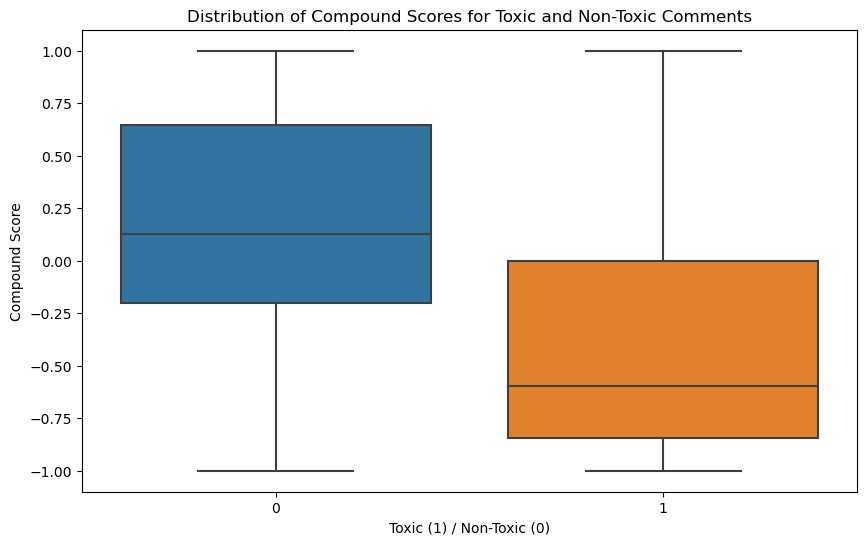

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='toxic', y='compound', data=train)
plt.title('Distribution of Compound Scores for Toxic and Non-Toxic Comments')
plt.xlabel('Toxic (1) / Non-Toxic (0)')
plt.ylabel('Compound Score')
plt.show()
